## O problemu

Fičeri: <br>
obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS <br>
alpha = Right Ascension angle (at J2000 epoch) <br>
delta = Declination angle (at J2000 epoch) <br>
u = Ultraviolet filter in the photometric system <br>
g = Green filter in the photometric system <br>
r = Red filter in the photometric system <br>
i = Near Infrared filter in the photometric system <br>
z = Infrared filter in the photometric system <br>
run_ID = Run Number used to identify the specific scan <br>
rereun_ID = Rerun Number to specify how the image was processed <br>
cam_col = Camera column to identify the scanline within the run <br>
field_ID = Field number to identify each field <br>
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class) <br>
class = object class (galaxy, star or quasar object) <br>
redshift = redshift value based on the increase in wavelength <br>
plate = plate ID, identifies each plate in SDSS <br>
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken <br>
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

## Priprema i preobrada podataka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

### Učitavanje podataka

In [3]:
df = pd.read_csv('star_classification.csv')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (100000, 18)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [4]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.nunique()

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

### Tretman duplikata

In [7]:
dupl = df.duplicated()
print('Broj duplikata: %d' % dupl.sum())

Broj duplikata: 0


In [8]:
df = df.drop_duplicates()
dupl_after = df.duplicated()
num_duplicates_after = dupl_after.sum()
print('Broj duplikata nakon uklanjanja: %d' % num_duplicates_after)

Broj duplikata nakon uklanjanja: 0


### Provera nedostajućih vrednosti

In [9]:
round((df.isnull().sum()*100 / df.shape[0]),2)

obj_ID         0.0
alpha          0.0
delta          0.0
u              0.0
g              0.0
r              0.0
i              0.0
z              0.0
run_ID         0.0
rerun_ID       0.0
cam_col        0.0
field_ID       0.0
spec_obj_ID    0.0
class          0.0
redshift       0.0
plate          0.0
MJD            0.0
fiber_ID       0.0
dtype: float64

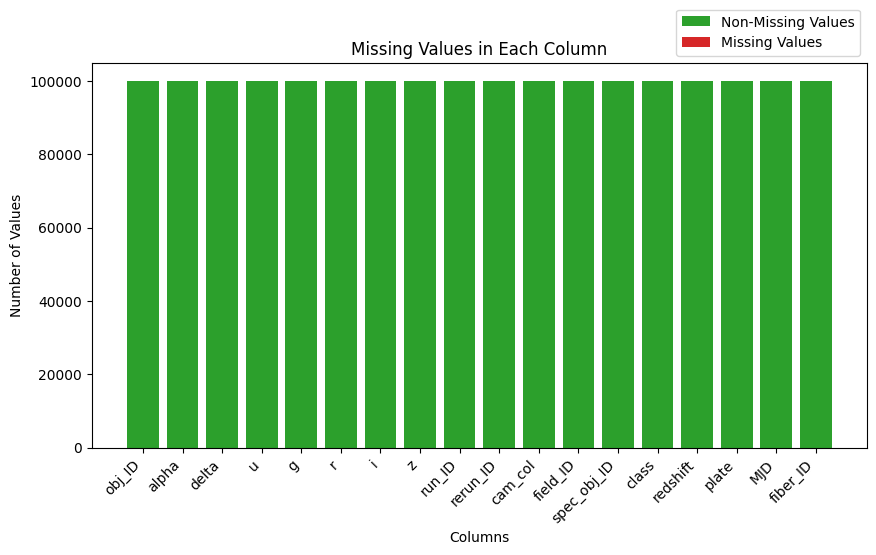

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

### Izbacivanje nepotrebnih kolona

In [11]:
df.drop("obj_ID", inplace=True, axis=1)

In [12]:
def get_one_value_cols(df):
    to_drop = []
    for col in df.columns:
        if len(df[col].unique()) == 1:
            to_drop.append(col)
    print(to_drop)
    return to_drop

In [13]:
df.drop(get_one_value_cols(df), axis=1, inplace=True)

['rerun_ID']


In [14]:
print(df.shape)
df.head(10)

(100000, 16)


,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


### Provera opsega fičera

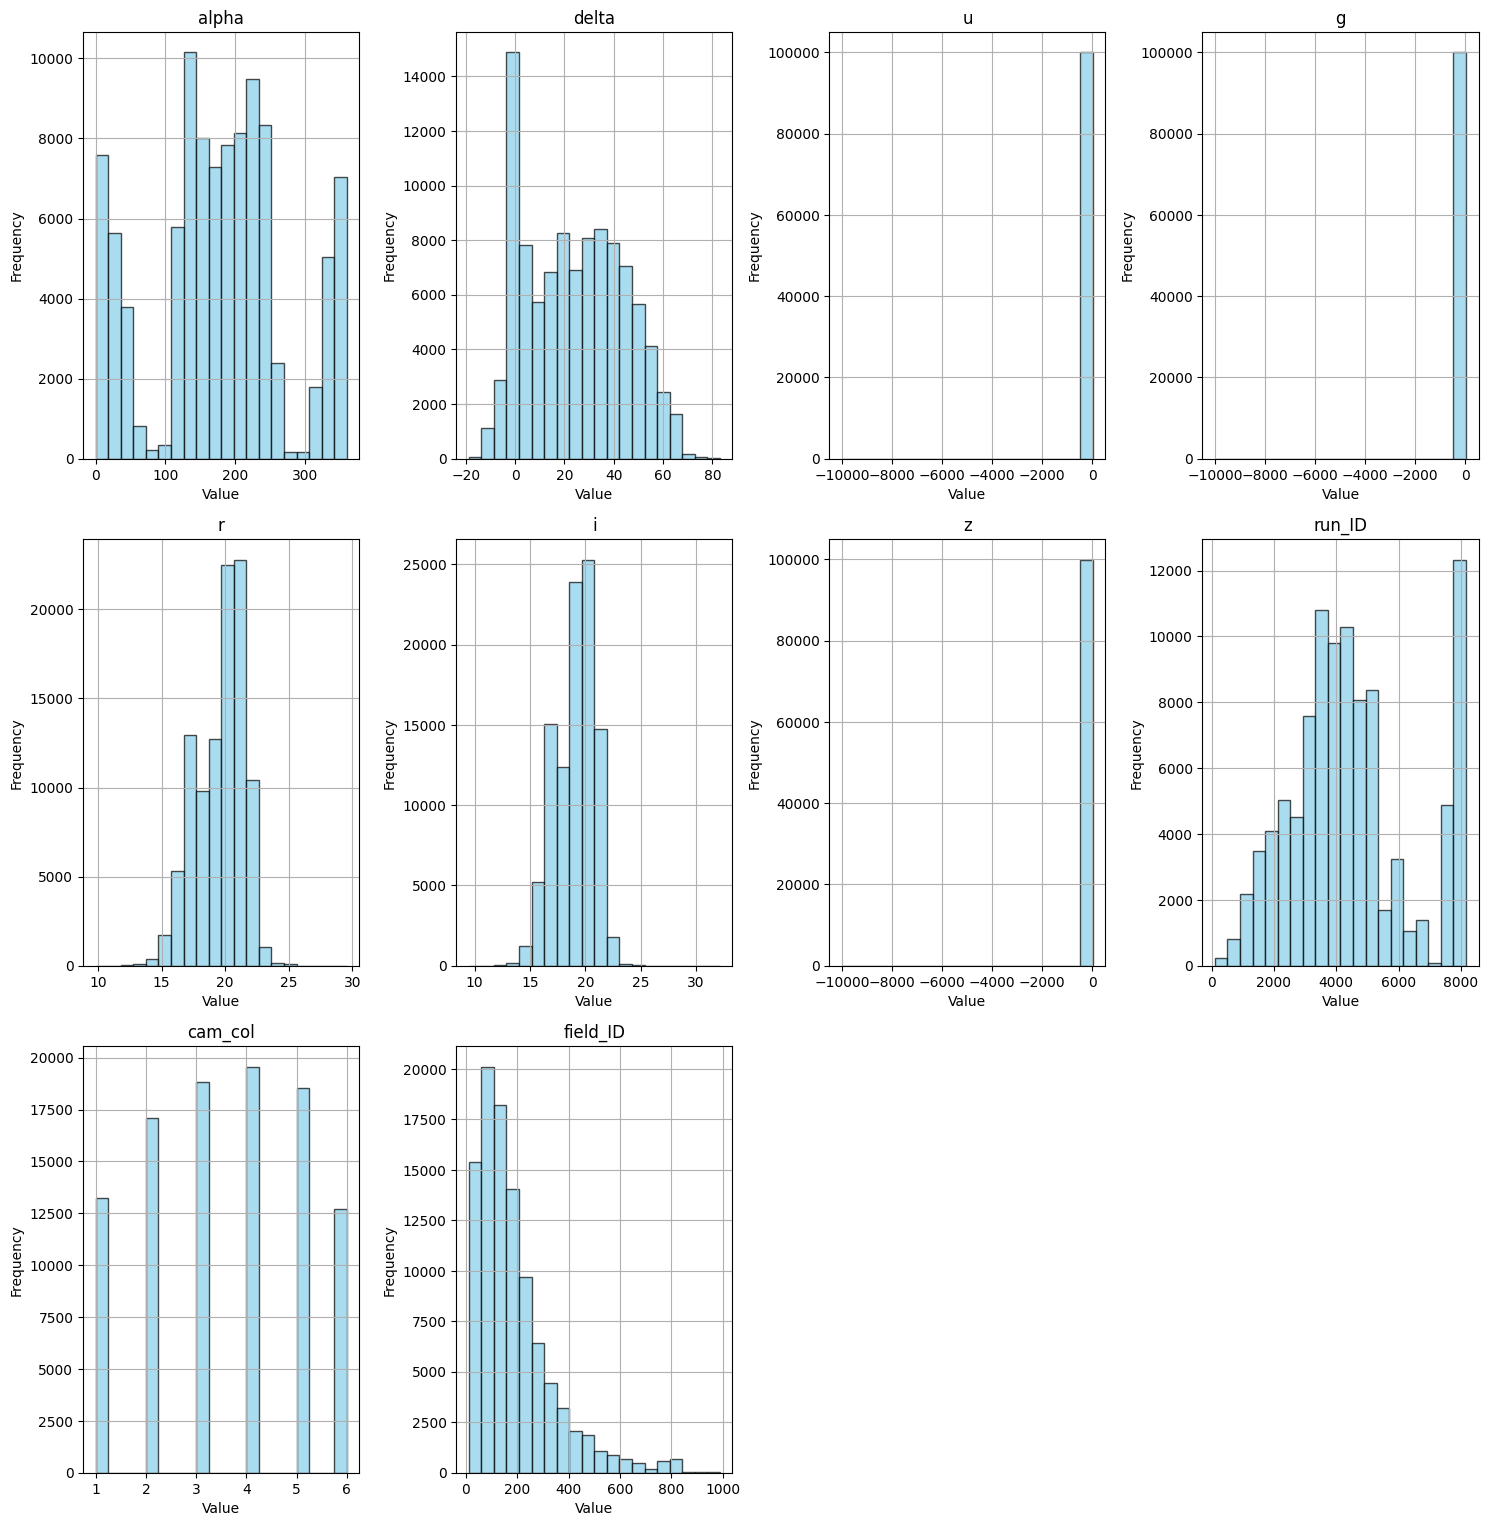

In [15]:
def plot_numerical_feature_distribution(data):
    numerical_features = data.select_dtypes(include=['float64', 'int64'])
    num_features = len(numerical_features.columns)
    num_cols = 4
    num_rows = 4
    plt.figure(figsize=(15, 5 * num_rows))
    
    numerical_features2 = numerical_features.iloc[:, :-5]

    for i, col in enumerate(numerical_features2.columns, 1):
        plt.subplot(num_rows, num_cols, i)
        data[col].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_numerical_feature_distribution(df)

### Tretman Outliera

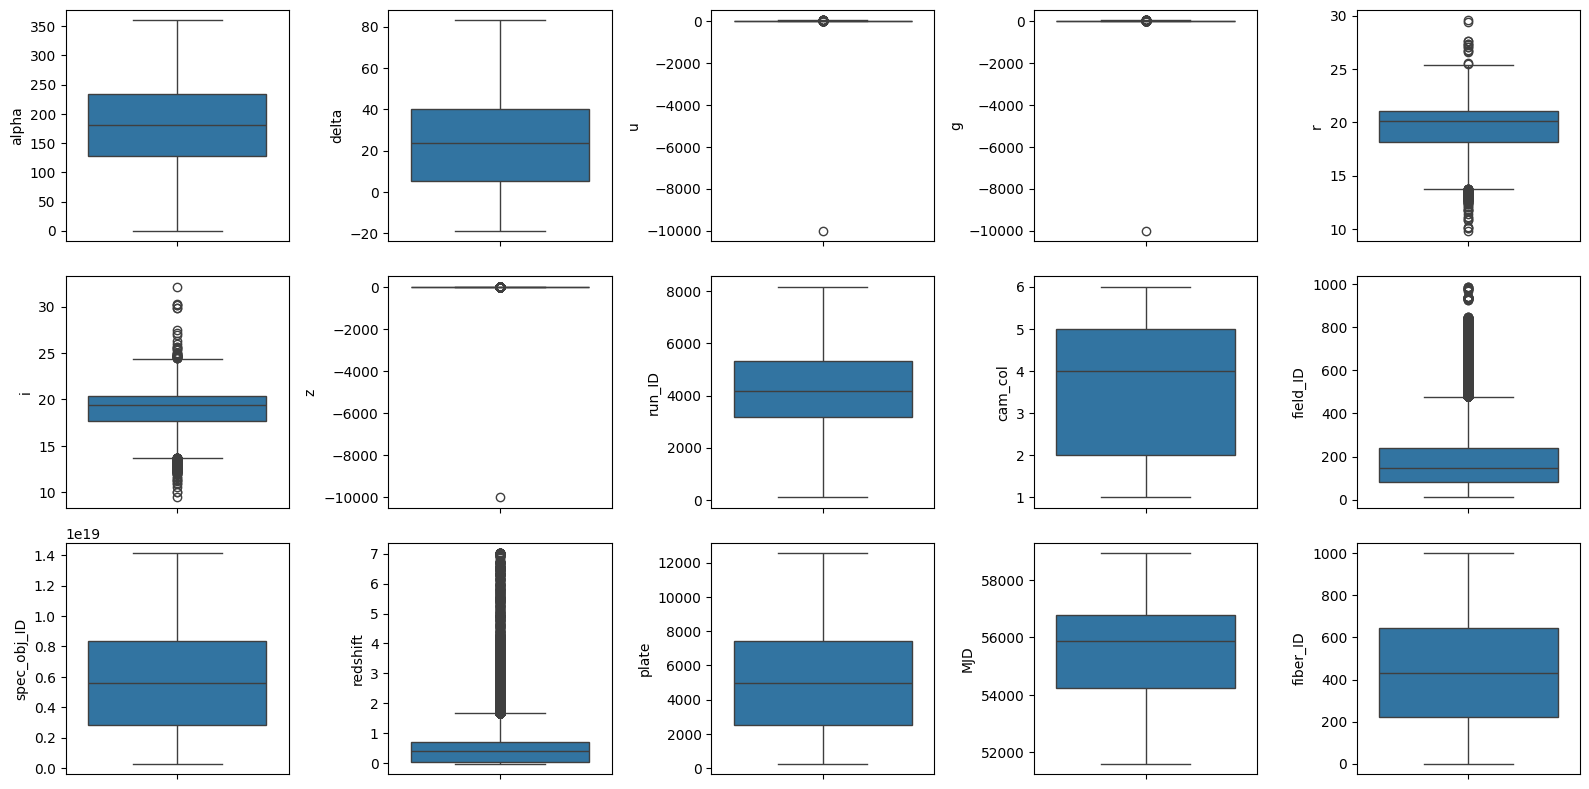

In [16]:
numerical_columns = df.select_dtypes(include=['number']).columns

num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns - 1) // 5 + 1  
num_cols = min(num_numerical_columns, 5)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(y=df[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

Z-Score

In [17]:
def remove_outliers_z_score(df, threshold=3):
    features = [col for col in df.columns if col != 'Class']
    z_scores = np.abs((df[features] - df[features].mean()) / df[features].std())
    outliers_mask = z_scores > threshold
    df_cleaned = df[~outliers_mask.any(axis=1)].copy()
    num_outliers_removed = len(df) - len(df_cleaned)
    print(f"Number of outliers removed: {num_outliers_removed}")
    return df_cleaned

Isolation Forest

In [18]:
from sklearn.ensemble import IsolationForest
 
def remove_outliers_isolation_forest(df, contamination=0.1):
    features = [col for col in df.columns if col != 'Class']
    model = IsolationForest(contamination=contamination, n_estimators=100, max_samples=256, max_features=10, random_state=42)
    model.fit(df[features])
    outliers = model.predict(df[features])
    df['Outlier'] = outliers
    df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])
    num_outliers_removed = len(df) - len(df_cleaned)
    print(num_outliers_removed)
    return df_cleaned

Local Outlier Factor

In [19]:
from sklearn.neighbors import LocalOutlierFactor
 
def remove_outliers_lof(df, contamination=0.1):

    features = df.select_dtypes(include=['number']).columns
    
    model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    outliers = model.fit_predict(df[features])
    df['Outlier'] = outliers
    df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])
    
    return df_cleaned

IRQ metod

In [20]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col',
       'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')

In [21]:
df=remove_outliers_lof(df)

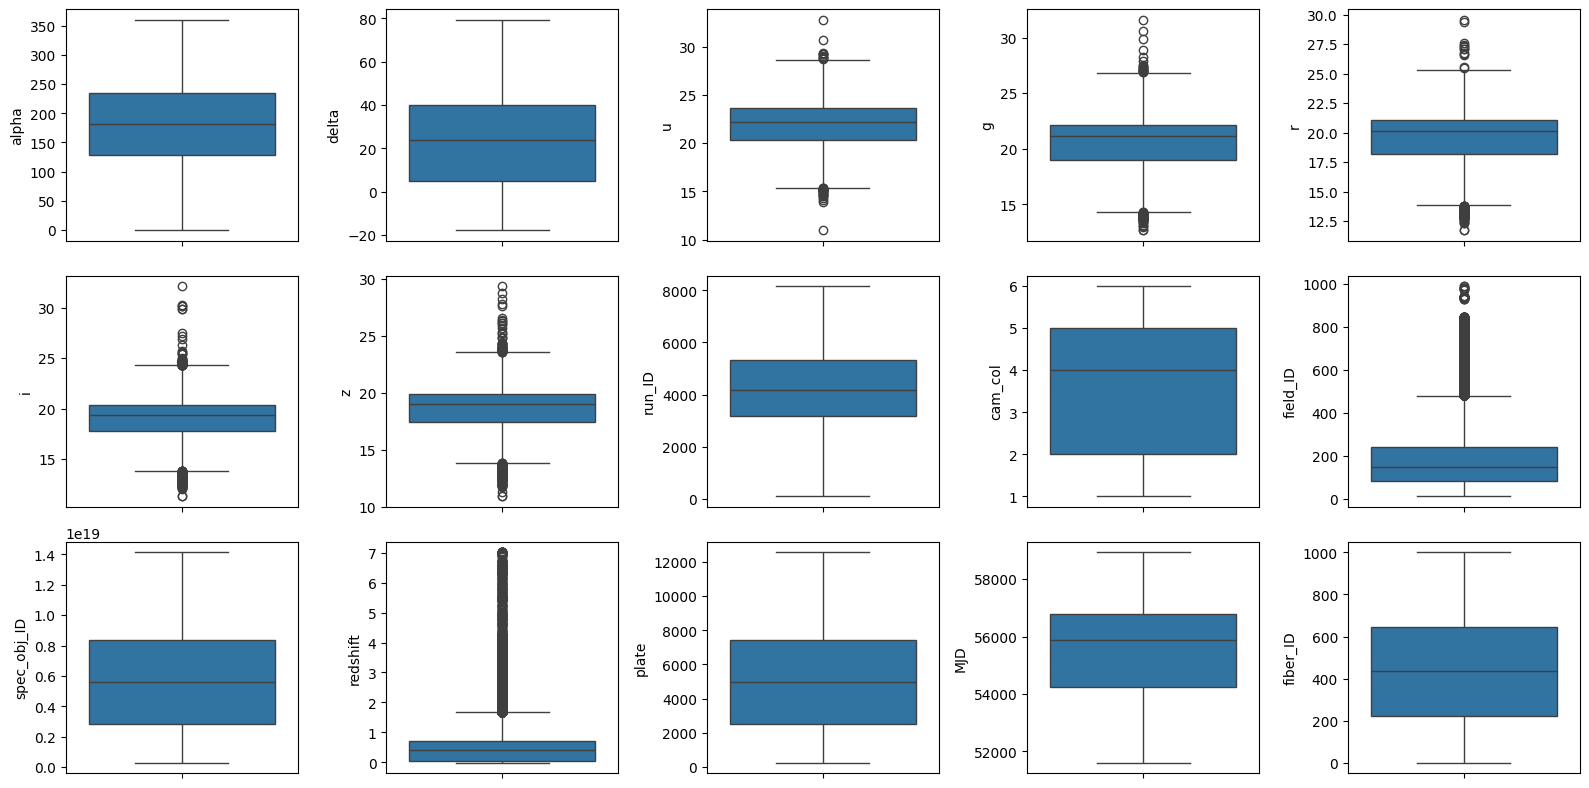

In [22]:
numerical_columns = df.select_dtypes(include=['number']).columns

num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns - 1) // 5 + 1  
num_cols = min(num_numerical_columns, 5)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(y=df[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

### Korelacija fičera

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_matrix

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
alpha,1.000000,0.138205,0.000945,-0.011136,-0.018957,-0.020021,-0.021733,-0.009063,0.018249,-0.170195,0.003950,0.004719,0.003949,0.026590,0.032357
delta,0.138205,1.000000,-0.028681,-0.006643,-0.005652,-0.003032,-0.004558,-0.302147,0.032686,-0.171252,0.118248,0.033695,0.118248,0.112530,0.028018
u,0.000945,-0.028681,1.000000,0.850932,0.723713,0.612234,0.539679,0.131060,0.006078,-0.019594,0.391617,0.161696,0.391615,0.433010,0.179997
g,-0.011136,-0.006643,0.850932,1.000000,0.931780,0.845034,0.773190,0.151272,0.006159,-0.028507,0.582388,0.316408,0.582386,0.609646,0.217668
r,-0.018957,-0.005652,0.723713,0.931780,1.000000,0.962211,0.918188,0.153990,0.006425,-0.032243,0.655716,0.432480,0.655714,0.671834,0.221060
i,-0.020021,-0.003032,0.612234,0.845034,0.962211,1.000000,0.970801,0.147559,0.005682,-0.031703,0.662690,0.492423,0.662689,0.673369,0.213021
z,-0.021733,-0.004558,0.539679,0.773190,0.918188,0.970801,1.000000,0.140448,0.004935,-0.031082,0.645776,0.501229,0.645775,0.654779,0.202595
run_ID,-0.009063,-0.302147,0.131060,0.151272,0.153990,0.147559,0.140448,1.000000,-0.049115,0.032539,0.239582,0.064785,0.239582,0.262888,0.066371
cam_col,0.018249,0.032686,0.006078,0.006159,0.006425,0.005682,0.004935,-0.049115,1.000000,-0.012384,-0.002483,-0.000338,-0.002486,-0.006954,0.125012
field_ID,-0.170195,-0.171252,-0.019594,-0.028507,-0.032243,-0.031703,-0.031082,0.032539,-0.012384,1.000000,-0.087272,-0.023571,-0.087272,-0.100616,-0.014105


<Axes: >

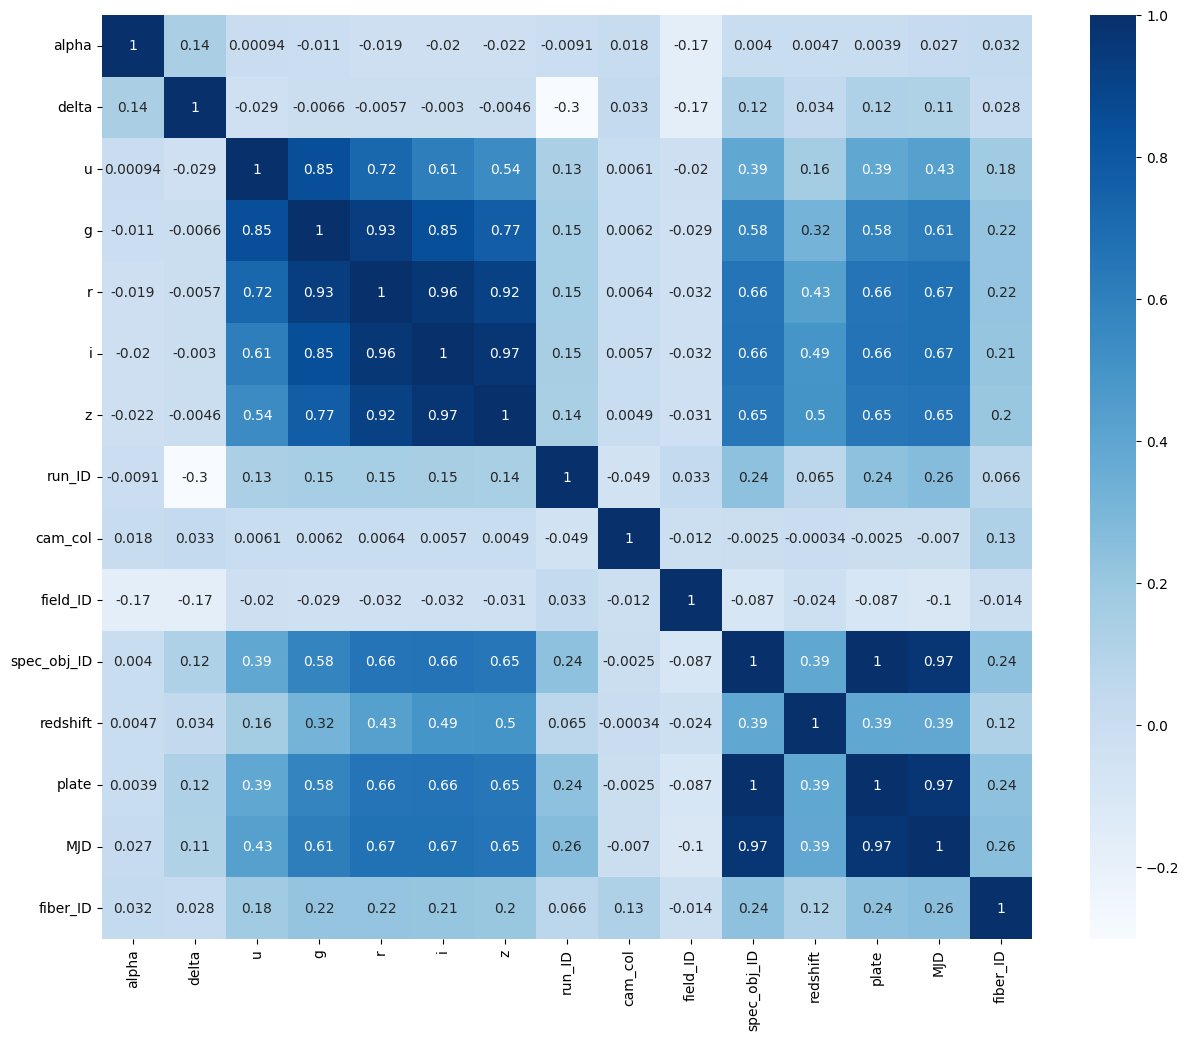

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
cor_matrix = numeric_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)

<Axes: >

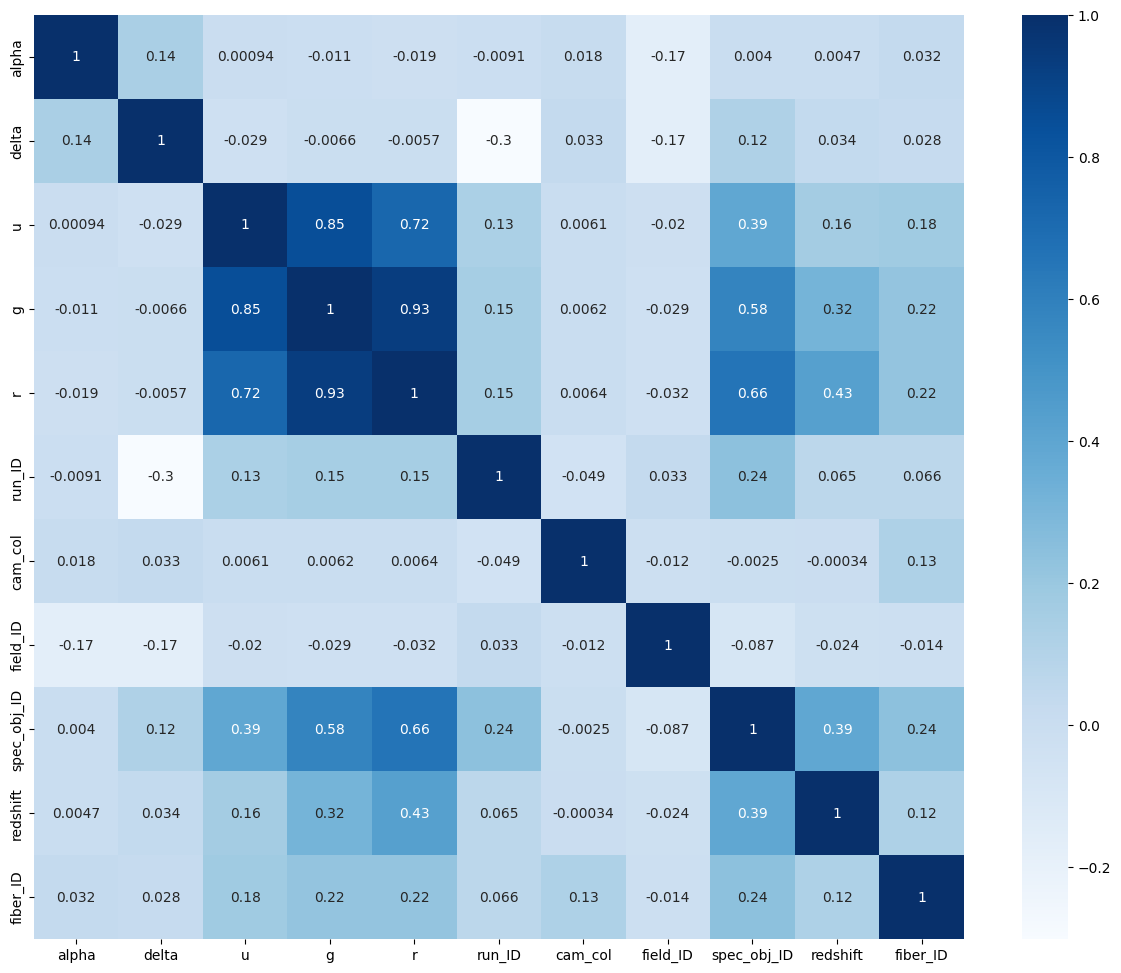

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')

### Balansiranje dataset-a

<Axes: ylabel='count'>

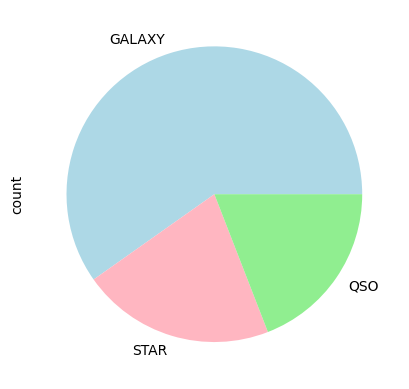

In [27]:
df['class'].value_counts().plot(kind='pie', colors=['lightblue', 'lightpink', 'lightgreen'])

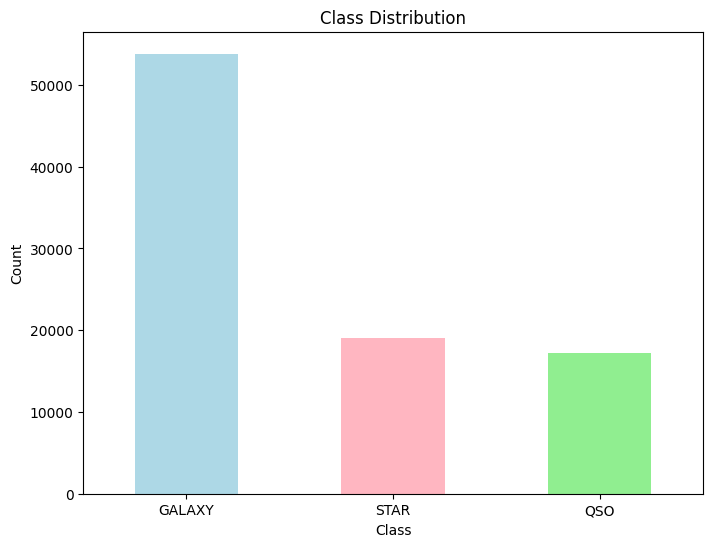

In [28]:
class_counts = df['class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['lightblue', 'lightpink', 'lightgreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

<Axes: ylabel='count'>

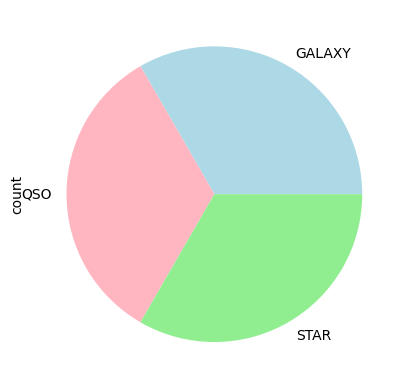

In [29]:
from imblearn.over_sampling import SMOTE

new_df = df.copy(deep=True)
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(new_df.drop(columns=['class']), new_df['class'])
df = pd.concat([X_resampled, y_resampled], axis=1)

df['class'].value_counts().plot(kind='pie', colors=['lightblue', 'lightpink', 'lightgreen'])

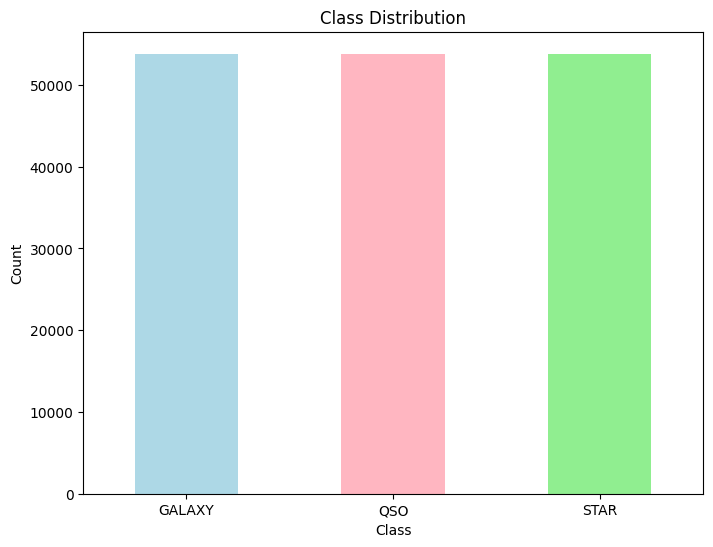

In [30]:
class_counts = df['class'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['lightblue', 'lightpink', 'lightgreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

### One Hot Enkodiranje Class kolone

In [31]:
one_coded = ['class']

dataframe_enc = pd.get_dummies(df, columns=one_coded)
print(dataframe_enc.shape)
print(dataframe_enc.head(10))

(161436, 14)
        alpha      delta         u         g         r  run_ID  cam_col  \
0  135.689107  32.494632  23.87882  22.27530  20.39501    3606        2   
1  144.826101  31.274185  24.77759  22.83188  22.58444    4518        5   
2  142.188790  35.582444  25.26307  22.66389  20.60976    3606        2   
3  338.741038  -0.402828  22.13682  23.77656  21.61162    4192        3   
4  345.282593  21.183866  19.43718  17.58028  16.49747    8102        3   
5  340.995121  20.589476  23.48827  23.33776  21.32195    8102        3   
6   23.234926  11.418188  21.46973  21.17624  20.92829    7773        2   
7    5.433176  12.065186  22.24979  22.02172  20.34126    7773        2   
8  200.290475  47.199402  24.40286  22.35669  20.61032    3716        5   
9   39.149691  28.102842  21.74669  20.03493  19.17553    5934        4   

   field_ID   spec_obj_ID  redshift  fiber_ID  class_GALAXY  class_QSO  \
0        79  6.543777e+18  0.634794       171          True      False   
1       119  

In [32]:
dataframe_enc.head(10)

,alpha,delta,u,g,r,run_ID,cam_col,field_ID,spec_obj_ID,redshift,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,135.689107,32.494632,23.87882,22.27530,20.39501,3606,2,79,6.543777e+18,0.634794,171,True,False,False
1,144.826101,31.274185,24.77759,22.83188,22.58444,4518,5,119,1.176014e+19,0.779136,427,True,False,False
2,142.188790,35.582444,25.26307,22.66389,20.60976,3606,2,120,5.152200e+18,0.644195,299,True,False,False
3,338.741038,-0.402828,22.13682,23.77656,21.61162,4192,3,214,1.030107e+19,0.932346,775,True,False,False
4,345.282593,21.183866,19.43718,17.58028,16.49747,8102,3,137,6.891865e+18,0.116123,842,True,False,False
5,340.995121,20.589476,23.48827,23.33776,21.32195,8102,3,110,5.658977e+18,1.424659,741,False,True,False
6,23.234926,11.418188,21.46973,21.17624,20.92829,7773,2,462,1.246262e+19,0.586455,113,False,True,False
7,5.433176,12.065186,22.24979,22.02172,20.34126,7773,2,346,6.961443e+18,0.477009,15,True,False,False
8,200.290475,47.199402,24.40286,22.35669,20.61032,3716,5,108,7.459285e+18,0.660012,719,True,False,False
9,39.149691,28.102842,21.74669,20.03493,19.17553,5934,4,122,2.751763e+18,-0.000008,232,False,False,True


### Skaliranje podataka

## Modeli NN

### NN - neskalirani podaci

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(15, input_shape=(11,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335 (1.31 KB)

 Trainable params: 335 (1.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.3330 - loss: 59696411872067584.0000 - val_accuracy: 0.3364 - val_loss: 4904613207605248.0000
Epoch 2/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3332 - loss: 4286434001289216.0000 - val_accuracy: 0.3364 - val_loss: 1951806682824704.0000
Epoch 3/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3346 - loss: 4008712289124352.0000 - val_accuracy: 0.3350 - val_loss: 3620377452347392.0000
Epoch 4/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3273 - loss: 3965463847501824.0000 - val_accuracy: 0.3364 - val_loss: 2989816123752448.0000
Epoch 5/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3323 - loss: 3581985276559360.0000 - val_accuracy: 0.3286 - val_loss: 1790150556254208.0000
Epoch 6/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3330 - loss: 3945340046671872.0000 - val_accuracy: 0.3364 - val_loss: 3361150137794560.0000
Epoch 7/50
4036/4036 ━━━━━━━━━━━━

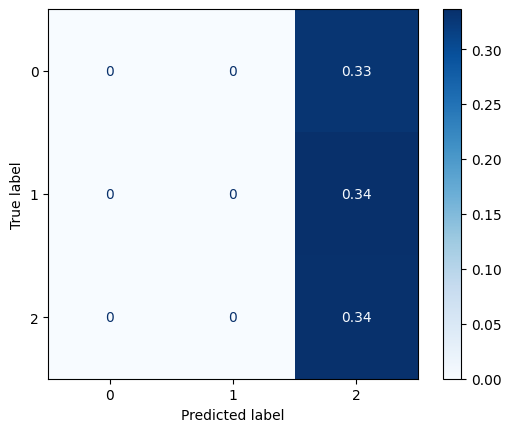

In [34]:
from copy import deepcopy
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import clone_model

def my_fit(df, model, epochs=30, batch_size=32, test_size=0.2):
    target_columns = [x for x in df.columns if "class_" in x]

    X = df.drop(columns=target_columns).values
    y = df[target_columns].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

    trained_model = clone_model(model) 
    trained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    earlystopping = EarlyStopping(monitor="loss",
                                  mode="min", patience=2,
                                  restore_best_weights=True)

    # obucavanje modela na trening skupu
    history = trained_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                callbacks=[earlystopping], validation_data=(X_test, y_test)) 

    y_prediction = trained_model.predict(X_test) # model se evaluira na test skupu
    y_prediction = np.argmax(y_prediction, axis=1)
    y_test = np.argmax(y_test, axis=1)

    result = confusion_matrix(y_test, y_prediction, normalize='pred')

    print(result)

    disp = ConfusionMatrixDisplay(confusion_matrix=result)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    return history # istorija sadrži informacije o gubicima i metrikama tokom obučavanja

history = my_fit(dataframe_enc, model, epochs=50)


In [35]:
# promene gubitka tokom epoha za trening i test skupove
def plot_loss(history):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    epoch_count = range(1, len(training_loss) + 1)

    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# promene tačnosti tokom epoha za trening i test skupove
def plot_accuracy(history):
    training_loss = history.history['accuracy']
    test_loss = history.history['val_accuracy']

    epoch_count = range(1, len(training_loss) + 1)

    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

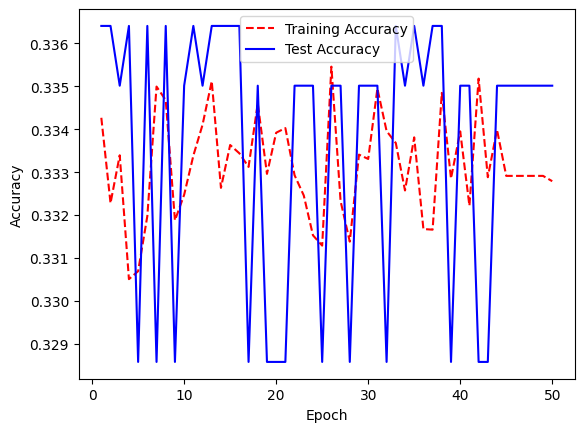

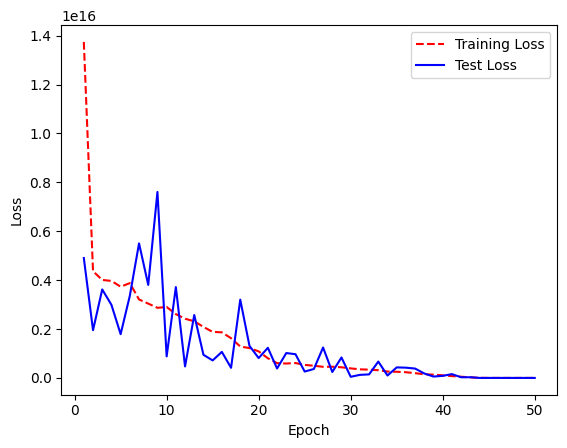

In [36]:
plot_accuracy(history)
plot_loss(history)

In [37]:
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import MinMaxScaler

def standardize(df,to_scale):
    scaler = MinMaxScaler()
    to_transform=df.drop([x for x in df.columns if x not in to_scale], axis=1)
    scaled = pd.DataFrame(scaler.fit_transform(to_transform))
    new_df = df.copy(deep=True)
    for index,col in enumerate(to_scale):
        new_df[col]=scaled[index]
    new_df.dropna(inplace=True)
    return new_df

### NN - Skalirani podaci

In [38]:
dataframe_enc_stand=standardize(dataframe_enc, list(dataframe_enc.columns))

Epoch 1/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7491 - loss: 0.5799 - val_accuracy: 0.9493 - val_loss: 0.1790
Epoch 2/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9510 - loss: 0.1700 - val_accuracy: 0.9609 - val_loss: 0.1360
Epoch 3/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9586 - loss: 0.1358 - val_accuracy: 0.9648 - val_loss: 0.1270
Epoch 4/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9634 - loss: 0.1218 - val_accuracy: 0.9641 - val_loss: 0.1128
Epoch 5/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9651 - loss: 0.1154 - val_accuracy: 0.9692 - val_loss: 0.1191
Epoch 6/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9665 - loss: 0.1121 - val_accuracy: 0.9710 - val_loss: 0.1013
Epoch 7/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9674 - loss: 0.1102 - val_accuracy: 0.9714 - val_loss: 0.0988
Epoch 8/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9683 - loss: 0.1068 - 

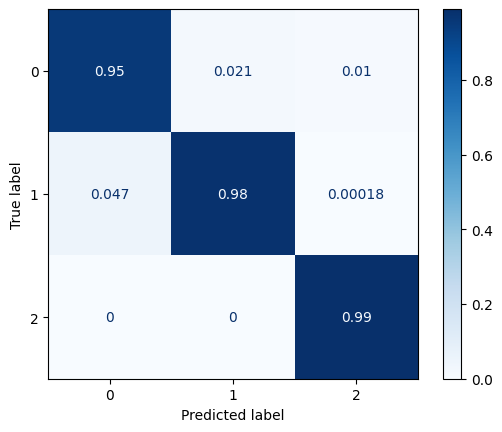

In [39]:
history = my_fit(dataframe_enc_stand, model, epochs=50)

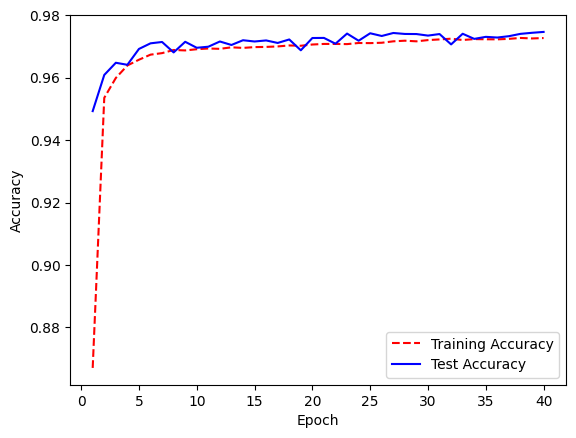

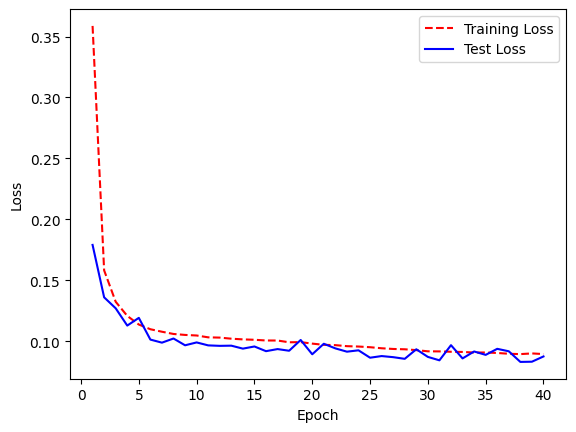

In [40]:
plot_accuracy(history)
plot_loss(history)

### Jos nekoliko NN modela

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout

model_1 = Sequential()
model_1.add(Dense(15, input_shape=(11,)))
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))  
model_1.add(Dense(8))
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(Dense(3, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.54 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 30 (120.00 B)

Epoch 1/50


4036/4036 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7306 - loss: 0.5780 - val_accuracy: 0.9554 - val_loss: 0.1552
Epoch 2/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9366 - loss: 0.1901 - val_accuracy: 0.9468 - val_loss: 0.1571
Epoch 3/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9451 - loss: 0.1689 - val_accuracy: 0.9620 - val_loss: 0.1296
Epoch 4/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9477 - loss: 0.1594 - val_accuracy: 0.9635 - val_loss: 0.1136
Epoch 5/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9497 - loss: 0.1557 - val_accuracy: 0.9627 - val_loss: 0.1116
Epoch 6/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9496 - loss: 0.1537 - val_accuracy: 0.9665 - val_loss: 0.1030
Epoch 7/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9521 - loss: 0.1497 - val_accuracy: 0.9601 - val_loss: 0.1185
Epoch 8/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9517 - loss: 0.1472 - val_accurac

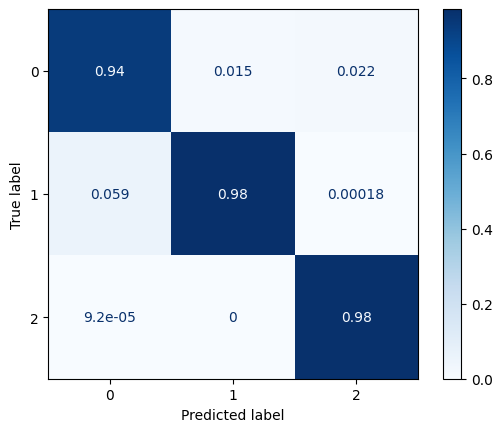

In [46]:
history = my_fit(dataframe_enc_stand, model_1, epochs=50)

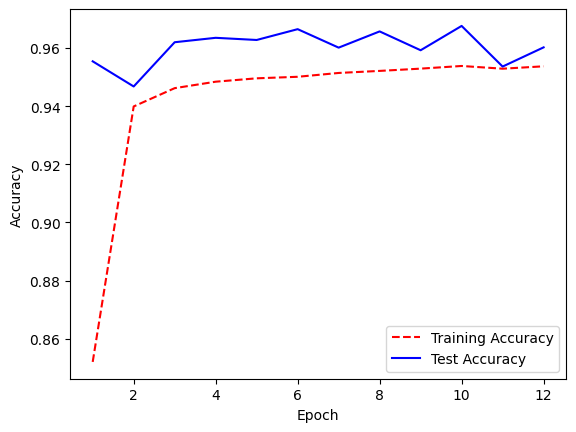

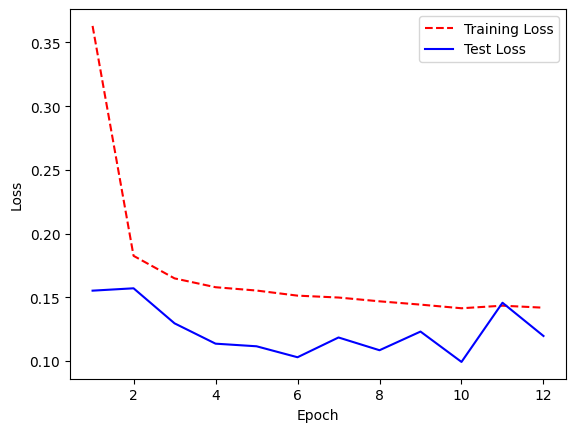

In [47]:
plot_accuracy(history)
plot_loss(history)

In [48]:
model_2 = Sequential()
model_2.add(Dense(15, input_shape=(11,), activation='tanh'))  # Tanh aktivacijska funkcija
model_2.add(Dropout(0.3))  # Dropout sloj za regularizaciju
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(3, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335 (1.31 KB)

 Trainable params: 335 (1.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7037 - loss: 0.6321 - val_accuracy: 0.9457 - val_loss: 0.1690
Epoch 2/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9455 - loss: 0.1756 - val_accuracy: 0.9616 - val_loss: 0.1220
Epoch 3/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9583 - loss: 0.1370 - val_accuracy: 0.9665 - val_loss: 0.1114
Epoch 4/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9609 - loss: 0.1282 - val_accuracy: 0.9673 - val_loss: 0.1066
Epoch 5/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9630 - loss: 0.1199 - val_accuracy: 0.9635 - val_loss: 0.1135
Epoch 6/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9640 - loss: 0.1172 - val_accuracy: 0.9677 - val_loss: 0.1018
Epoch 7/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9657 - loss: 0.1130 - val_accuracy: 0.9692 - val_loss: 0.0999
Epoch 8/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9658 - loss: 0.1131 - 

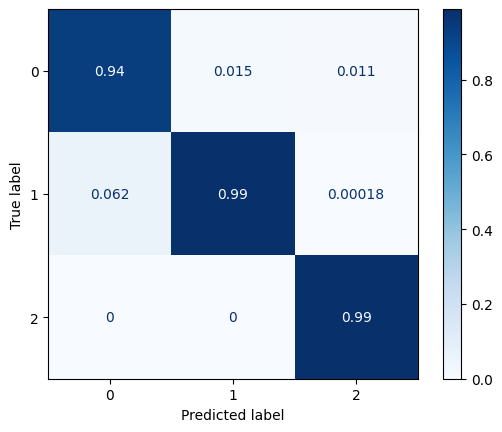

In [49]:
history = my_fit(dataframe_enc_stand, model_2, epochs=50)

In [50]:
from tensorflow.keras.layers import Dropout

model_3 = Sequential()
model_3.add(Dense(15, input_shape=(11,), activation='sigmoid'))  # Sigmoid aktivacijska funkcija
model_3.add(Dropout(0.2))  # Dropout sloj za regularizaciju
model_3.add(Dense(8, activation='sigmoid'))
model_3.add(Dense(3, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335 (1.31 KB)

 Trainable params: 335 (1.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4605 - loss: 1.0061 - val_accuracy: 0.8030 - val_loss: 0.5584
Epoch 2/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7371 - loss: 0.5732 - val_accuracy: 0.8966 - val_loss: 0.3777
Epoch 3/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8165 - loss: 0.4419 - val_accuracy: 0.9129 - val_loss: 0.2994
Epoch 4/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8536 - loss: 0.3713 - val_accuracy: 0.9276 - val_loss: 0.2549
Epoch 5/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8745 - loss: 0.3268 - val_accuracy: 0.9351 - val_loss: 0.2284
Epoch 6/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8860 - loss: 0.2991 - val_accuracy: 0.9334 - val_loss: 0.2111
Epoch 7/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8965 - loss: 0.2789 - val_accuracy: 0.9419 - val_loss: 0.1931
Epoch 8/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9063 - loss: 0.2587 - 

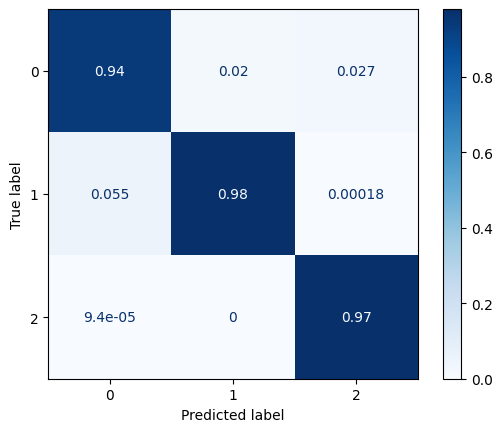

In [51]:
history = my_fit(dataframe_enc_stand, model_3, epochs=50)

## Overfitovanje

Target Columns: ['class_GALAXY', 'class_QSO', 'class_STAR']
Shape of X: (1024, 11)
Shape of y: (1024, 3)
Shape of X_train: (819, 11)
Shape of X_test: (205, 11)
Shape of y_train: (819, 3)
Shape of y_test: (205, 3)
Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4331 - loss: 1.0716 - val_accuracy: 0.6976 - val_loss: 1.0183
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6714 - loss: 1.0085 - val_accuracy: 0.6976 - val_loss: 0.9562
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6698 - loss: 0.9563 - val_accuracy: 0.6976 - val_loss: 0.9059
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6804 - loss: 0.9125 - val_accuracy: 0.6976 - val_loss: 0.8697
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6758 - loss: 0.8999 - val_accuracy: 0.6976 - val_loss: 0.8489
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6774 - loss: 0.8835 - val_accuracy: 0.6976 - val_loss: 0.8388
Epoch 7/1000
4/4 ━━━━━━━━

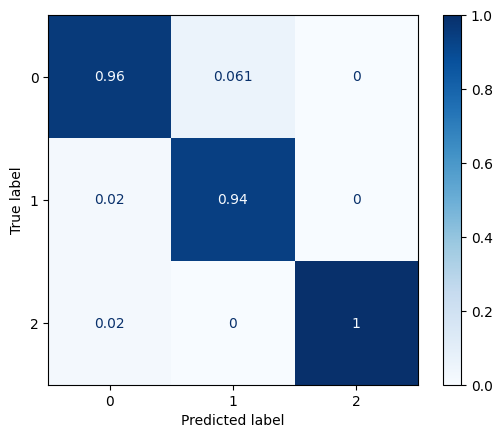

In [52]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

def my_overfit(df, epochs=100, batch_size=32, test_size=0.2):
    target_columns = [x for x in df.columns if "class_" in x]

    print("Target Columns:", target_columns)

    if not target_columns:
        raise ValueError("No target columns found in the DataFrame.")

    X = df.drop(columns=target_columns).values
    y = df[target_columns].values

    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

    trained_model = Sequential()
    trained_model.add(Dense(40, input_shape=(11,), activation='relu'))
    trained_model.add(Dense(30, activation='relu'))
    trained_model.add(Dense(20, activation='relu'))
    trained_model.add(Dense(3, activation='softmax'))

    trained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = trained_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    y_prediction = trained_model.predict(X_test) 
    y_prediction = np.argmax(y_prediction, axis=1)
    y_test = np.argmax(y_test, axis=1)
    result = confusion_matrix(y_test, y_prediction, normalize='pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=result)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    return history


history_overfit = my_overfit(dataframe_enc_stand.iloc[:1024], batch_size=256, epochs=1000, test_size=0.2)



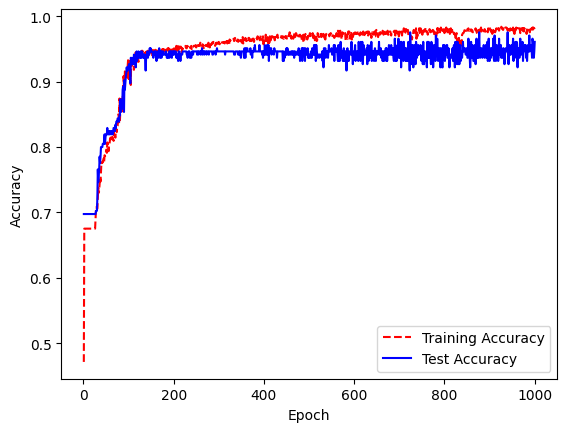

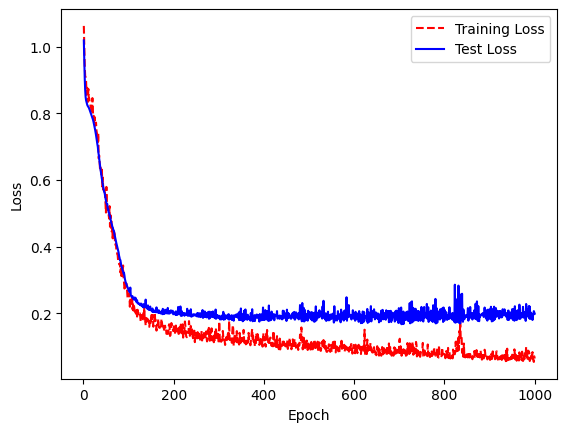

In [53]:
plot_accuracy(history_overfit)
plot_loss(history_overfit)

### Dynamic learning rate

In [54]:
import numpy as np
from keras.callbacks import LearningRateScheduler

def my_fit_cb(df,model,epochs=30,batch_size=32,test_size=0.2,callbacks=[]):
    target_columns = [x for x in df.columns if "class_" in x]
    X = df.drop(columns=target_columns).values
    y = df[target_columns].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)
    
    trained_model = clone_model(model) 
    trained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history=trained_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,callbacks =callbacks,validation_data=(X_test,y_test))

    y_prediction = trained_model.predict(X_test)
    y_prediction = np.argmax (y_prediction, axis = 1)
    y_test=np.argmax(y_test, axis=1)
    
    result = confusion_matrix(y_test, y_prediction , normalize='pred')

    print(result)

    disp = ConfusionMatrixDisplay(confusion_matrix=result)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    return history

Epoch 1/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8637 - loss: 0.3322 - val_accuracy: 0.9585 - val_loss: 0.1328 - learning_rate: 0.0100
Epoch 2/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9600 - loss: 0.1338 - val_accuracy: 0.9644 - val_loss: 0.1135 - learning_rate: 0.0075
Epoch 3/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9660 - loss: 0.1147 - val_accuracy: 0.9660 - val_loss: 0.1143 - learning_rate: 0.0056
Epoch 4/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9673 - loss: 0.1099 - val_accuracy: 0.9697 - val_loss: 0.0994 - learning_rate: 0.0042
Epoch 5/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9686 - loss: 0.1038 - val_accuracy: 0.9686 - val_loss: 0.1008 - learning_rate: 0.0032
Epoch 6/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9700 - loss: 0.0997 - val_accuracy: 0.9706 - val_loss: 0.1099 - learning_rate: 0.0024
Epoch 7/50
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9717 - l

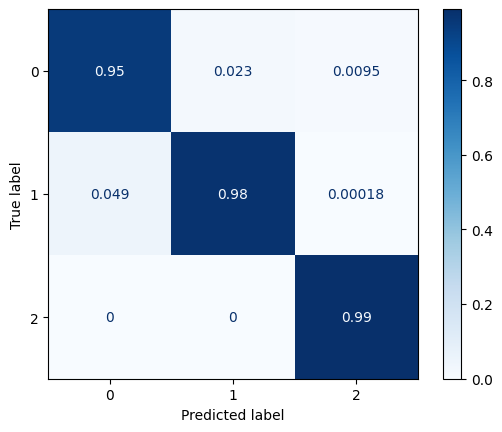

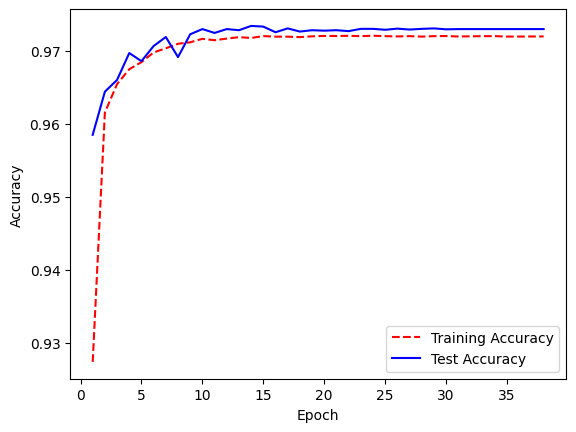

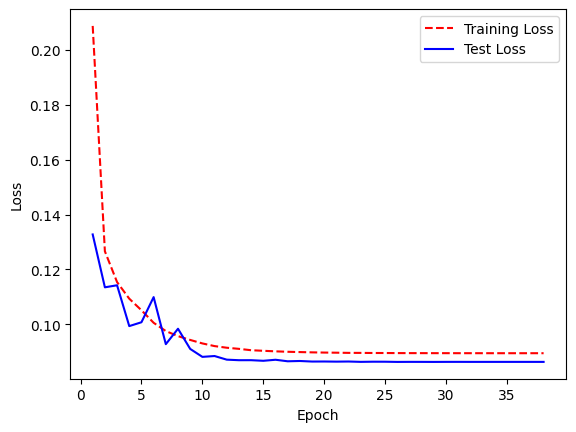

In [55]:
import keras.callbacks as callbacks

earlystopping = callbacks.EarlyStopping(monitor ="loss", 
                                        mode ="min", patience = 2, 
                                        restore_best_weights = True)
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-2, decay_factor=0.75, step_size=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_lr = my_fit_cb(dataframe_enc_stand,model,callbacks=[earlystopping, lr_sched],epochs=50)

plot_accuracy(hist_lr)
plot_loss(hist_lr)

### Custom Loss

In [56]:
import keras.backend as K
from tensorflow.keras.layers import Dense, Dropout

def custom_mse(y_true, y_pred):
     #Mean Squared Error
    loss = K.square(y_pred - y_true)
    loss = loss * [0.2, 0.4, 0.4]
    loss = K.sum(loss, axis=1)
    
    return loss

model_loss = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    Dropout(0.3),  # Dodavanje dropout sloja za regularizaciju
    Dense(32, activation='relu'),
    Dropout(0.3),  # Dodavanje dropout sloja za regularizaciju
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model_loss.compile(loss=custom_mse, optimizer='adam', metrics=['accuracy'])

Epoch 1/30
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7511 - loss: 0.5253 - val_accuracy: 0.9613 - val_loss: 0.1280
Epoch 2/30
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9537 - loss: 0.1481 - val_accuracy: 0.9648 - val_loss: 0.1121
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[9.23042182e-01 1.95474242e-02 1.72636632e-02]
 [6.08797760e-02 9.80452576e-01 5.53914328e-04]
 [1.60780417e-02 0.00000000e+00 9.82182422e-01]]


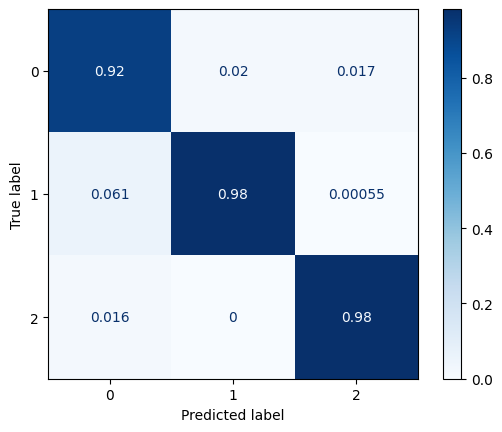

In [57]:
hist_loss = my_fit_cb(dataframe_enc_stand,model_loss,callbacks=[earlystopping],epochs=30)

#plot_accuracy(hist_loss)
#plot_loss(hist_loss)

### Custom Metrics

Epoch 1/30
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7321 - loss: 0.5999 - val_accuracy: 0.9515 - val_loss: 0.1809
Epoch 2/30
4036/4036 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9495 - loss: 0.1705 - val_accuracy: 0.9569 - val_loss: 0.1393
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step
[[9.18516463e-01 2.12682544e-02 4.08941719e-02]
 [8.02811691e-02 9.78731746e-01 7.09660250e-04]
 [1.20236774e-03 0.00000000e+00 9.58396168e-01]]


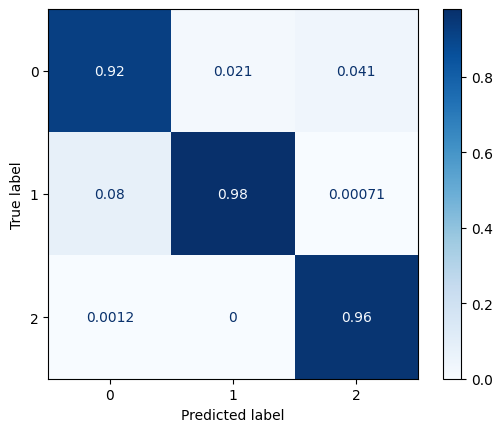

In [58]:
def eval_mae(y_true, y_pred):
    #Mean Absolute Error
    eval = K.abs(y_pred - y_true)
    eval = K.mean(eval, axis=-1)
        
    return eval
  
model_eval = Sequential()
model_eval.add(Dense(15, input_shape=(11,), activation='relu'))
model_eval.add(Dense(8, activation='relu'))
model_eval.add(Dense(3, activation='softmax'))

model_eval.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[eval_mae])

hist_eval = my_fit_cb(dataframe_enc_stand,model_eval,callbacks=[earlystopping],epochs=30)

#plot_loss(hist_eval)

In [61]:
training_loss = hist_eval.history['loss']
test_loss = hist_eval.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

#plt.plot(epoch_count, training_loss, 'r--')
#plt.plot(epoch_count, test_loss, 'b-')
#plt.legend(['Training Loss', 'Test Loss'])
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.show()
